In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import torch
import dgl
import torch_geometric.utils.convert
import torch_geometric.transforms as T
from torch_geometric.datasets.dblp import DBLP
import community as community_louvain
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

### PubMed

In [2]:
def get_node_type(node_type):
    if node_type == 1:
        return 'disease'
    elif node_type == 0:
        return 'gene'
    elif node_type == 2:
        return 'chemical'
    elif node_type == 3:
        return 'species'

In [3]:
required_edges = [('gene', 'gene'),
 ('gene', 'disease'),
 ('disease', 'disease'),
 ('chemical', 'gene'),
 ('chemical', 'disease'),
 ('chemical','chemical'),
 ('chemical','species'),
 ('species','gene'), 
 ('species','disease'),
 ('species','species' )]

In [4]:
#required_edges

In [5]:
def graph_gen(nodeid, G):
    
    num_hops = 2  
    nodes = []
    edges = []
    #Get small graph nodes
    nodes = nx.single_source_shortest_path_length(G, nodeid, cutoff=num_hops).keys() 
    graph = nx.ego_graph(G,nodeid, num_hops, center=True,undirected = True)
    #Get small graph edges
    edges = [e for e in graph.edges]
    
    node_types=nx.get_node_attributes(graph, "class")
   
    source,dest =list(map(list, zip(*edges)))
    remaining_edges = []
    
    for i in range(len(edges)):
        source_node_type = get_node_type(node_types[source[i]])
        dest_node_type = get_node_type(node_types[dest[i]])
        
        if not (source_node_type,dest_node_type) in required_edges:
            remaining_edges.append((source_node_type,dest_node_type))
    
    graph.remove_edges_from(remaining_edges)        
    graph.remove_nodes_from(list(nx.isolates(graph)))

    return graph

In [6]:
def plot_graph(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}

    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show() 

In [7]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [8]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

In [9]:
G_syn_pubmed = nx.read_gexf('PubMed_hgen.gexf')

Explanation graph of class 0

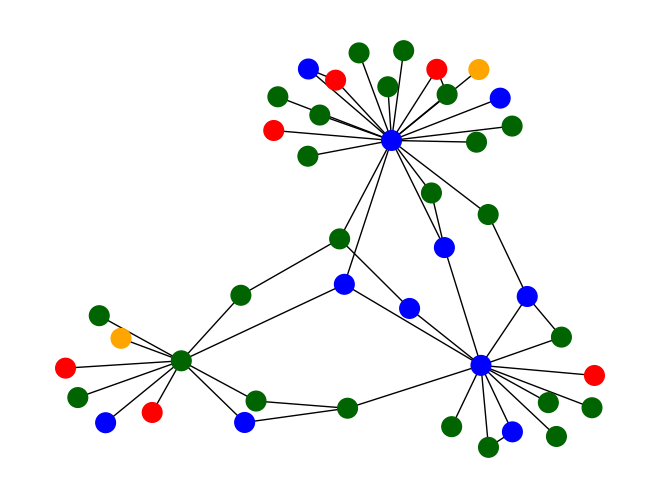

In [10]:
class0 = graph_gen('35', G_syn_pubmed)
plot_graph(class0)

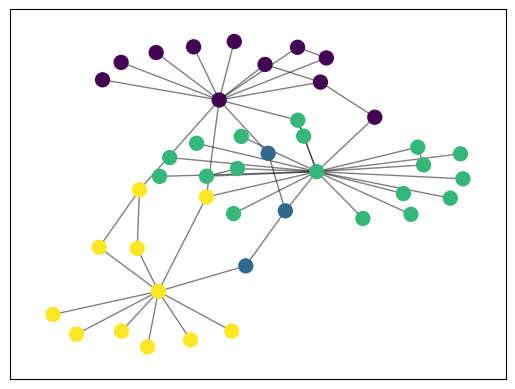

[{'1282', '1325', '221'},
 {'1184',
  '1271',
  '1292',
  '1310',
  '1388',
  '1467',
  '1492',
  '1507',
  '1519',
  '1520',
  '213',
  '284',
  '399',
  '55',
  '694',
  '868',
  '93',
  '983'},
 {'1002',
  '1094',
  '1097',
  '1162',
  '1244',
  '127',
  '1356',
  '1359',
  '182',
  '367',
  '48'},
 {'1061',
  '107',
  '1168',
  '1236',
  '1395',
  '1501',
  '1564',
  '285',
  '35',
  '360',
  '510'}]

In [11]:
detect_community(class0)
list_com= nx.community.louvain_communities(class0, seed=123)
list_com

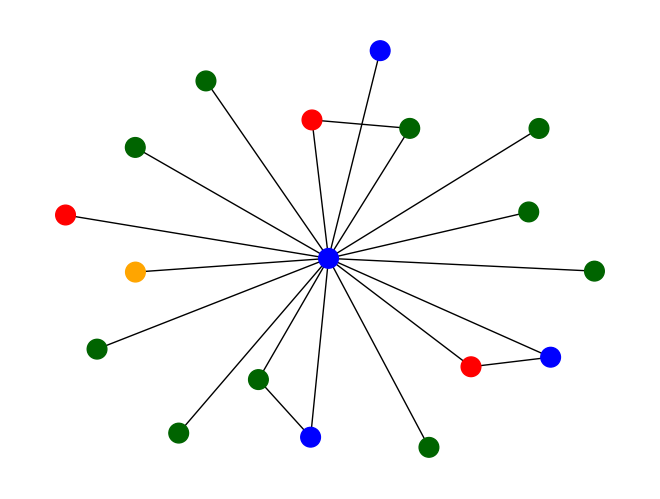

In [12]:
#Largest substructure
H = class0.subgraph(max(list_com, key=len))
plot_graph(H)

Explanation graph of class 1

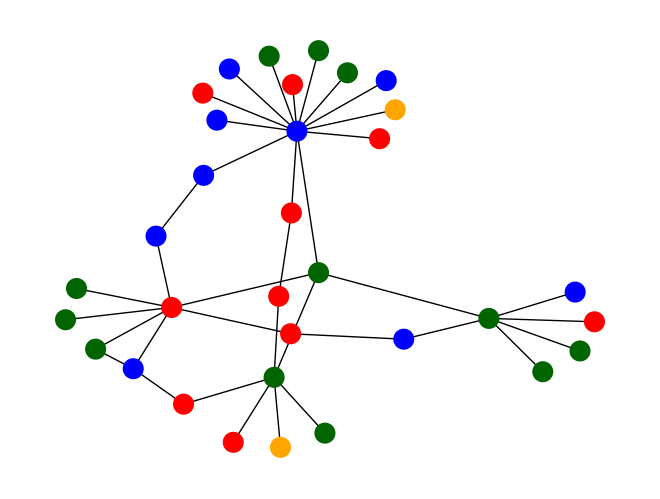

In [13]:
class1 = graph_gen('1025', G_syn_pubmed)
plot_graph(class1)

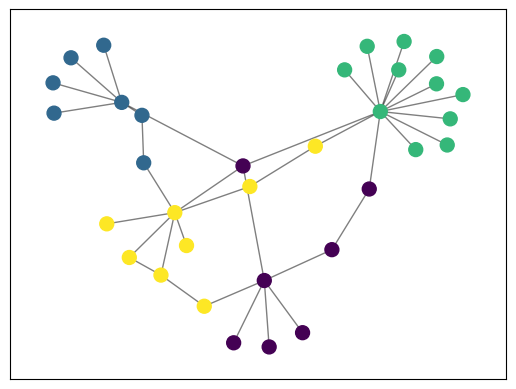

[{'1096', '1229', '1486', '158', '264', '572', '926'},
 {'1025', '1183', '1253', '1329', '271', '445', '922'},
 {'1061',
  '107',
  '11',
  '1168',
  '1382',
  '139',
  '1537',
  '45',
  '471',
  '577',
  '955'},
 {'1051', '1372', '1562', '395', '475', '714'},
 {'133', '180'}]

In [14]:
detect_community(class1)
list_com= nx.community.louvain_communities(class1, seed=123)
list_com

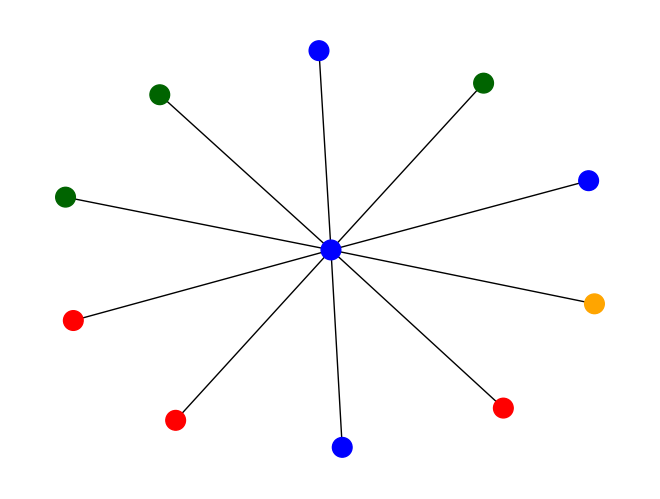

In [15]:
#Largest substructure
H = class1.subgraph(max(list_com, key=len))
plot_graph(H)

Explanation graph of class 2

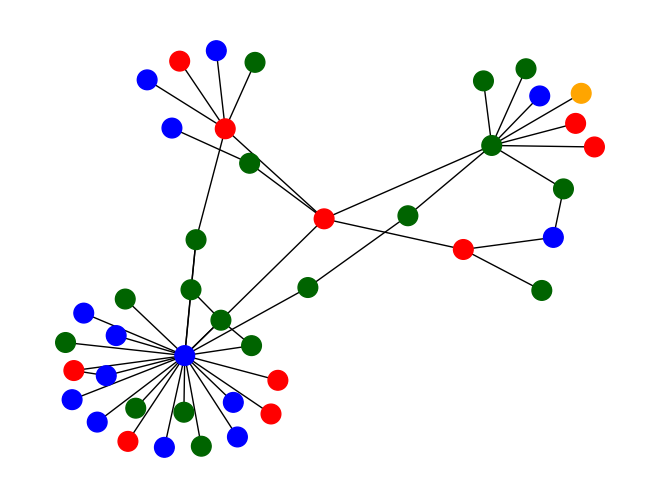

In [16]:
class2 = graph_gen('559', G_syn_pubmed)
plot_graph(class2)

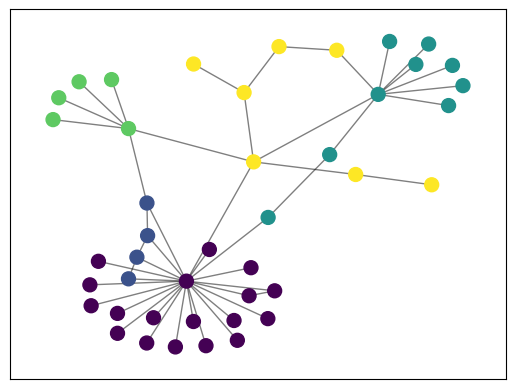

[{'1038',
  '1197',
  '1337',
  '1388',
  '1488',
  '172',
  '209',
  '217',
  '224',
  '300',
  '311',
  '343',
  '36',
  '361',
  '38',
  '615',
  '70',
  '757'},
 {'1227', '1293', '160', '291', '559', '849', '961'},
 {'1172', '1196', '1271', '1303', '136', '1556', '864', '884', '968'},
 {'1020', '1095', '1327', '1332', '1349', '200', '535', '728', '88'}]

In [17]:
detect_community(class2)
list_com= nx.community.louvain_communities(class2, seed=123)
list_com

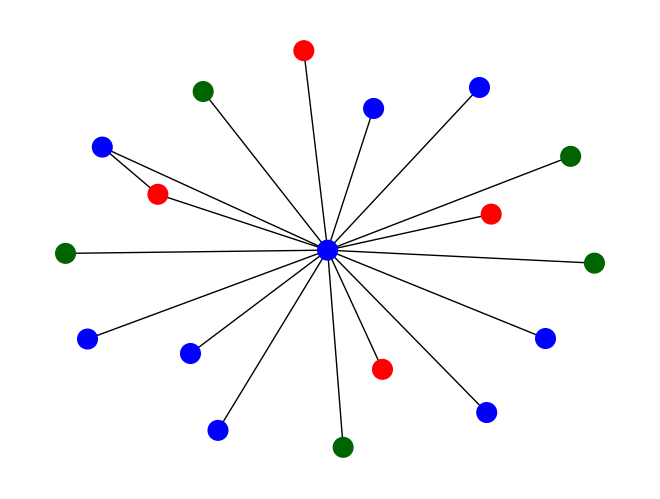

In [18]:
#Largest substructure
H = class2.subgraph(max(list_com, key=len))
plot_graph(H)

Explanation graph of class 3

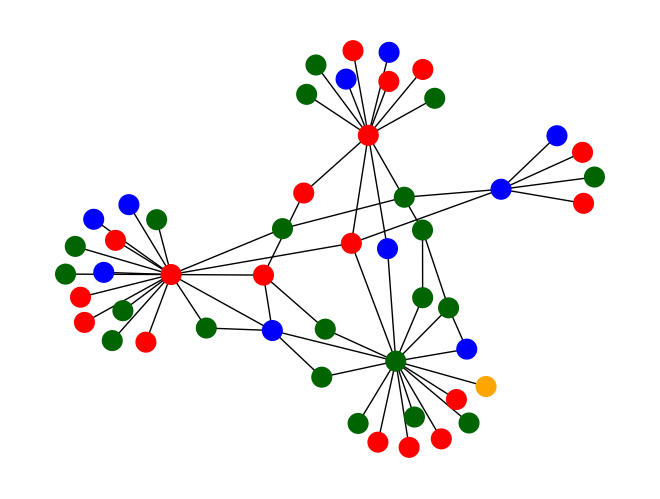

In [19]:
class3 = graph_gen('319', G_syn_pubmed)
plot_graph(class3)

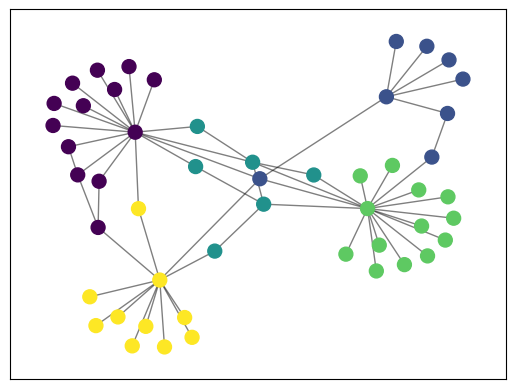

[{'1124',
  '1137',
  '1212',
  '1282',
  '1291',
  '16',
  '332',
  '406',
  '470',
  '569',
  '621',
  '94',
  '97'},
 {'1388', '1499', '210', '260', '319', '362', '784', '958'},
 {'1091', '1120', '1306', '225', '587', '939'},
 {'109', '1299', '1336', '144', '1504', '279', '710', '758', '827', '901'},
 {'1080',
  '1089',
  '1175',
  '1239',
  '1313',
  '1315',
  '1430',
  '1559',
  '173',
  '597',
  '836',
  '845',
  '888'}]

In [20]:
detect_community(class3)
list_com= nx.community.louvain_communities(class3, seed=123)
list_com

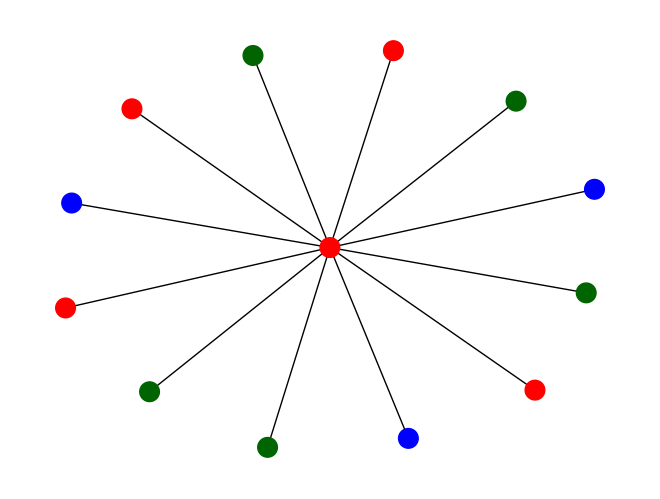

In [21]:
H = class3.subgraph(max(list_com, key=len))
plot_graph(H)

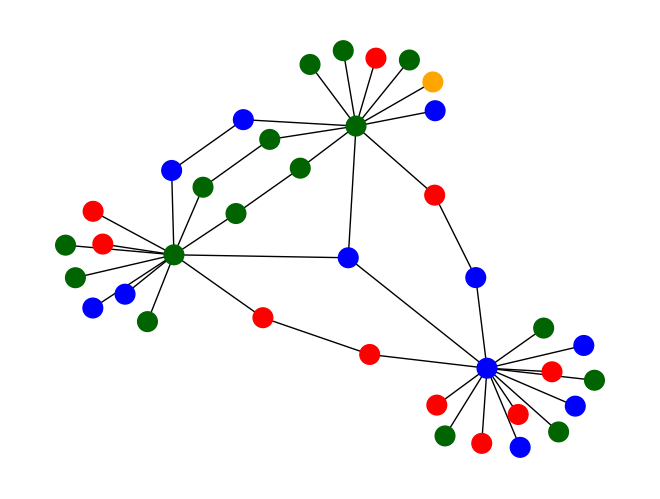

In [23]:
class6 = graph_gen('85', G_syn_pubmed)
plot_graph(class6)

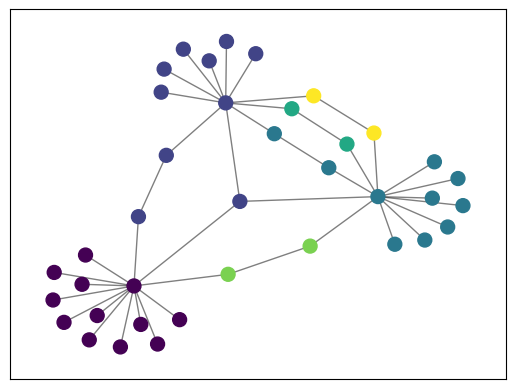

[{'1131',
  '1210',
  '134',
  '1388',
  '1501',
  '194',
  '195',
  '5',
  '825',
  '844',
  '884',
  '933'},
 {'1007', '1130', '1204', '1247', '1263', '1363', '1550', '28', '85', '883'},
 {'405', '487'},
 {'16', '631'},
 {'14', '155'},
 {'1089', '1239', '1327', '1330', '1432', '1461', '156', '278', '443', '764'}]

In [24]:
detect_community(class6)
list_com= nx.community.louvain_communities(class6, seed=123)
list_com

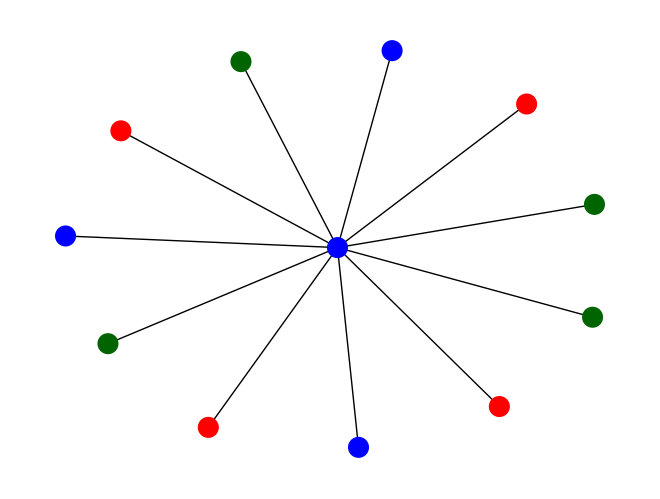

In [25]:
H = class6.subgraph(max(list_com, key=len))
plot_graph(H)